# Multinomial Logistic Regression

## Import relevant libraries

In [23]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [24]:
from sklearn.datasets import make_classification

## Create classification data

In [54]:
X, y = make_classification(n_samples = 10, n_features = 2, n_informative = 2, n_redundant = 0, n_classes = 3, n_clusters_per_class = 1, class_sep = 5, shuffle=False)

In [55]:
X

array([[ 3.94231909,  6.20615984],
       [ 5.28622515,  4.94139112],
       [ 5.06491963,  5.2384248 ],
       [ 5.0342954 ,  4.52055311],
       [-3.86112898, -6.81240199],
       [-6.36723608, -4.30123025],
       [-4.50723551, -5.40269328],
       [-4.47684036,  5.29858836],
       [-3.2780809 ,  5.96120317],
       [-7.66883387,  3.66511605]])

In [56]:
y

array([0, 0, 0, 0, 1, 1, 1, 2, 2, 2])

Text(0,0.5,'X2')

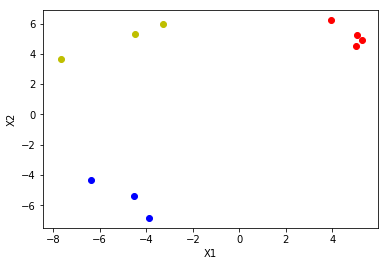

In [57]:
red = plt.scatter(X[:4,0], X[:4,1], c='r')
blue = plt.scatter(X[4:7,0], X[4:7,1], c='b')
yellow = plt.scatter(X[7:,0], X[7:,1], c='y')
plt.xlabel("X1")
plt.ylabel("X2")

## One vs. All split

In [58]:
result = {}

i=0
for v in y:
    if v not in result.keys():
            result[v] = [0] * len(y)
    result[v][i] = 1
    i+=1

y_0 = result[0]
y_1 = result[1]
y_2 = result[2]

for key in result.keys():
        print('{}: {}'.format(key, result[key]))

0: [1, 1, 1, 1, 0, 0, 0, 0, 0, 0]
1: [0, 0, 0, 0, 1, 1, 1, 0, 0, 0]
2: [0, 0, 0, 0, 0, 0, 0, 1, 1, 1]


## Define relevant functions

In [59]:
def sigmoid(theta, x):
    return 1. / (1. + np.exp(-np.dot(x, theta)))

def gradient(theta, x, y):
    first_calc = sigmoid(theta, x) - np.squeeze(y)
    final_calc = np.dot(x.transpose(), first_calc)
    return final_calc

def cost_func(theta, x, y):
    hypothesis = sigmoid(theta,x)
    y = np.squeeze(y)
    step1 = y * np.log(hypothesis)
    step2 = (1-y) * np.log(1 - hypothesis)
    final = -step1 - step2
    return np.mean(final)

def gradient_descent(theta_opt, X, y, alpha=.001, min_change=.001):
    # Set-up cost-iteration list
    cost_iter = []
    cost = cost_func(theta_opt, X, y)
    cost_iter.append([0, cost])
    change_cost = 1
    i = 1
    while(change_cost > min_change):
        old_cost = cost
        theta_opt = theta_opt - (alpha * gradient(theta_opt, X, y))
        cost = cost_func(theta_opt, X, y)
        cost_iter.append([i, cost])
        change_cost = old_cost - cost
        i+=1
    return theta_opt, np.array(cost_iter)

## Fit the parameters for each classifier

In [60]:
shape = X.shape[1]
betas0 = np.zeros(shape)
betas1 = np.zeros(shape)
betas2 = np.zeros(shape)

fitted_values0, cost_iter = gradient_descent(betas0, X, y_0)
fitted_values1, cost_iter = gradient_descent(betas1, X, y_1)
fitted_values2, cost_iter = gradient_descent(betas2, X, y_2)

fitted_values = np.asarray([fitted_values0, fitted_values1, fitted_values2])

fitted_values

array([[ 0.52623251,  0.08464008],
       [-0.05705366, -0.51912376],
       [-0.19526047,  0.13536739]])

## Predict values

In [61]:
predictions = []

for i in range(10):
    predictions.append(sigmoid(fitted_values.transpose(), X[i]))
predictions
#print(np.argmax(predictions, 1))

[array([ 0.93085298,  0.03086776,  0.51757589]),
 array([ 0.96083515,  0.05381978,  0.41016396]),
 array([ 0.95725044,  0.04704949,  0.43048645]),
 array([ 0.95399156,  0.06698507,  0.40828408]),
 array([ 0.06859632,  0.97717415,  0.45803615]),
 array([ 0.02378325,  0.93061306,  0.65949021]),
 array([ 0.05576976,  0.95529013,  0.53711572]),
 array([ 0.12927481,  0.07619516,  0.83081383]),
 array([ 0.22785269,  0.05178034,  0.80954125]),
 array([ 0.02353675,  0.18768643,  0.88011898])]

## Visualize classifier

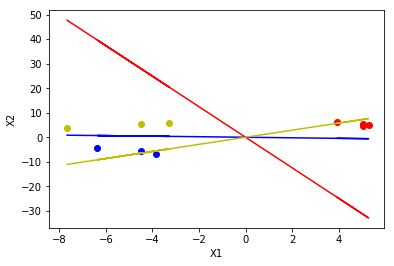

In [62]:
red = plt.scatter(X[:4,0], X[:4,1], c='r')
blue = plt.scatter(X[4:7,0], X[4:7,1], c='b')
yellow = plt.scatter(X[7:,0], X[7:,1], c='y')
plt.xlabel("X1")
plt.ylabel("X2")

plt.plot(X[:,0], -fitted_values[0][0]/fitted_values[0][1]*X[:,0], c='r')
plt.plot(X[:,0], -fitted_values[1][0]/fitted_values[1][1]*X[:,0], c='b')
plt.plot(X[:,0], -fitted_values[2][0]/fitted_values[2][1]*X[:,0], c='y')